In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotdata(cho,nob,con):
    fig, ax = plt.subplots()
    ax.scatter(cho, nob)
    for i, txt in enumerate(con):
        ax.annotate(txt, (cho[i], nob[i]))

In [3]:
def plotdatafit(a,b,cho,nob,con):
    fig, ax = plt.subplots()
    ax.scatter(cho, nob)
    for i, txt in enumerate(con):
        ax.annotate(txt, (cho[i], nob[i]))
    ax.plot(cho,a*cho + b)

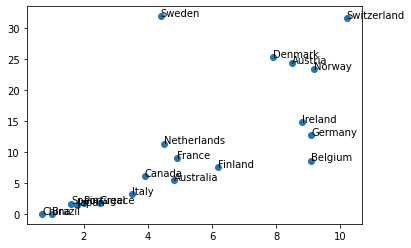

In [4]:
cho = np.array([4.4, 10.2, 7.9, 8.5, 9.2, 8.8, 9.1, 4.5, 4.9, 9.1, 6.2, 3.9, 4.8, 3.5, 2.5, 2.0, 1.6, 1.8, 0.7, 1.0])
nob = np.array([31.855, 31.544, 25.255, 24.332, 23.368, 14.824, 12.668, 11.356, 8.990, 8.622, 7.600, 6.122, 5.451, 3.265, 1.857, 1.855, 1.701, 1.492, 0.060, 0.050])
countries = np.array(["Sweden", "Switzerland", "Denmark", "Austria", "Norway", "Ireland", "Germany", "Netherlands", 
                  "France", "Belgium", "Finland", "Canada", "Australia", "Italy", "Greece", "Portugal", "Spain",
                  "Japan", "China", "Brazil"])     
n = nob.size
plotdata(cho, nob, countries)


In [5]:
def badness(a, b, cho, nob):
    # A compact implemntation of the formular from the assigment. 
    # The inner part of the formular is first calculated, then summed together and then timed with 1/20
    return (1/20)*sum((nob-a*cho-b)**2)


In [6]:
def badnessgradient (a,b,cho,nob) :
    # A compact implementation of the formular from the assigment. First the inner is differentialet accoring to a,b. 
    # The results are then summed up and timed with 1/20   
    #return (1/20 * sum(np.diff((nob-a*cho-b)**2,0)), 1/20 * sum (np.diff((nob-a*cho-b)**2,1)))
    
    sum1 = 0
    sum2 = 0
    for i in range(20):
        sum1 += 2*(nob[i]-a*cho[i]-b)*(-cho[i])/20
        sum2 += 2*(nob[i]-a*cho[i]-b)*(-1)/20
    return [sum1,sum2]    
    

In [7]:
#import numpy as np
badnessgradient(1,0,cho,nob)

[-88.85158999999999, -11.766699999999998]

(2.359541676999574, -1.3595416769995745)
49.98669001213736


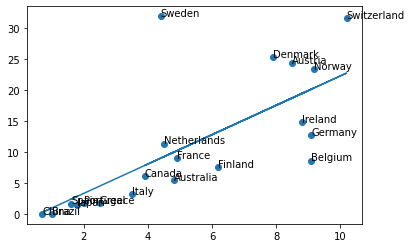

In [8]:
# Starting values of a = 1 and b = 0 

ab = (1,0)
# Number for our "steps"
steps =0.0001

# a while loop that checks if badness is under 50
while 110 > badness(ab[0],ab[1],cho,nob) > 50 :
    
    # A implementation of the formular form the assigmemt 
    ab = (ab[0] + steps * badness(ab[0],ab[1],cho,nob) , ab[1] - steps * badness(ab[0],ab[1],cho,nob))

# printing and plotting the results 
    
print (ab)
print (badness(ab[0],ab[1],cho,nob))
plotdatafit(ab[0],ab[1],cho,nob,countries)

[-88.85158999999999, -11.766699999999998]
2.3548982730571937 -1.049760476300205
49.99997889762267
[-0.04382677143783459, 0.30601498357783624]


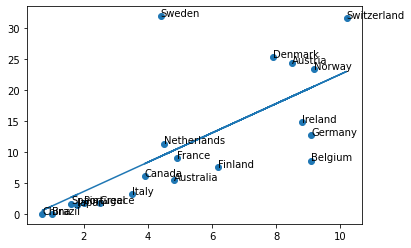

In [14]:
# Starting values of a = 1 and b = 0 
a = 1.0
b = 0.0
# Number for our "steps"
steps = 0.001
print (badnessgradient(a,b,cho,nob))
# a while loop that checks if badness is under 50
while badness(a,b,cho,nob) > 50 :
    
    # A implementation of the formular form the assigmemt 
    a = a - steps * badnessgradient(a,b,cho,nob)[0] 
    b = b - steps * badnessgradient(a,b,cho,nob)[1]
    
# printing and plotting the results 
    
print (a, b)
print (badness(a,b,cho,nob))
print (badnessgradient(a,b,cho,nob))
plotdatafit(a,b,cho,nob,countries)